No hold 30, 20, 40, 40. Second try.

In [1]:
# --- Imports ---
import os
import sys
import random
import pickle
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from env_economic_choice_no_hold_2 import EconomicChoiceEnv
from actor_critic_song import ActorCriticAgent
from reinforce_song import train_agent
from helper_functions import plot_metrics, plot_firing_rates, plot_psychometric_curve, load_model, save_model

# --- Set Random Seeds ---
seed_value = 1
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

print("Setup Complete.")

2025-05-20 09:38:45.208268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747726726.775775  161096 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747726727.228082  161096 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747726730.931649  161096 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747726730.931671  161096 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747726730.931673  161096 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.


Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...


2025-05-19 20:28:27.788014: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 10000 episodes...
Episode 100	Total Reward: -0.10	State [1. 0. 0. 0.]	Actor Loss: -0.0051	Critic Loss: 0.0001
Episode 200	Total Reward: -0.10	State [1. 0. 0. 0.]	Actor Loss: -0.0030	Critic Loss: 0.0001
Episode 300	Total Reward: -0.09	State [1. 0. 0. 0.]	Actor Loss: 0.0036	Critic Loss: 0.0001
Episode 400	Total Reward: -0.10	State [1. 0. 0. 0.]	Actor Loss: -0.0027	Critic Loss: 0.0000
Episode 500	Total Reward: -0.09	State [1. 0. 0. 0.]	Actor Loss: 0.0063	Critic Loss: 0.0002
Episode 600	Total Reward: -0.09	State [1. 0. 0. 0.]	Actor Loss: -0.0009	Critic Loss: 0.0001
Episode 700	Total Reward: 13.26	State [ 0.  -1.   0.2  0.8]	Actor Loss: 8.2392	Critic Loss: 174.5215
Episode 800	Total Reward: -0.09	State [1. 0. 0. 0.]	Actor Loss: -0.1276	Critic Loss: 0.0123
Episode 900	Total Reward: -0.09	State [1. 0. 0. 0.]	Actor Loss: -0.0869	Critic Loss: 0.0030
Episode 1000	Total Reward: -0.08	State [1. 0. 0. 0.]	Actor Loss: -0.0424	Critic Loss: 0.0014
Episode 1100	

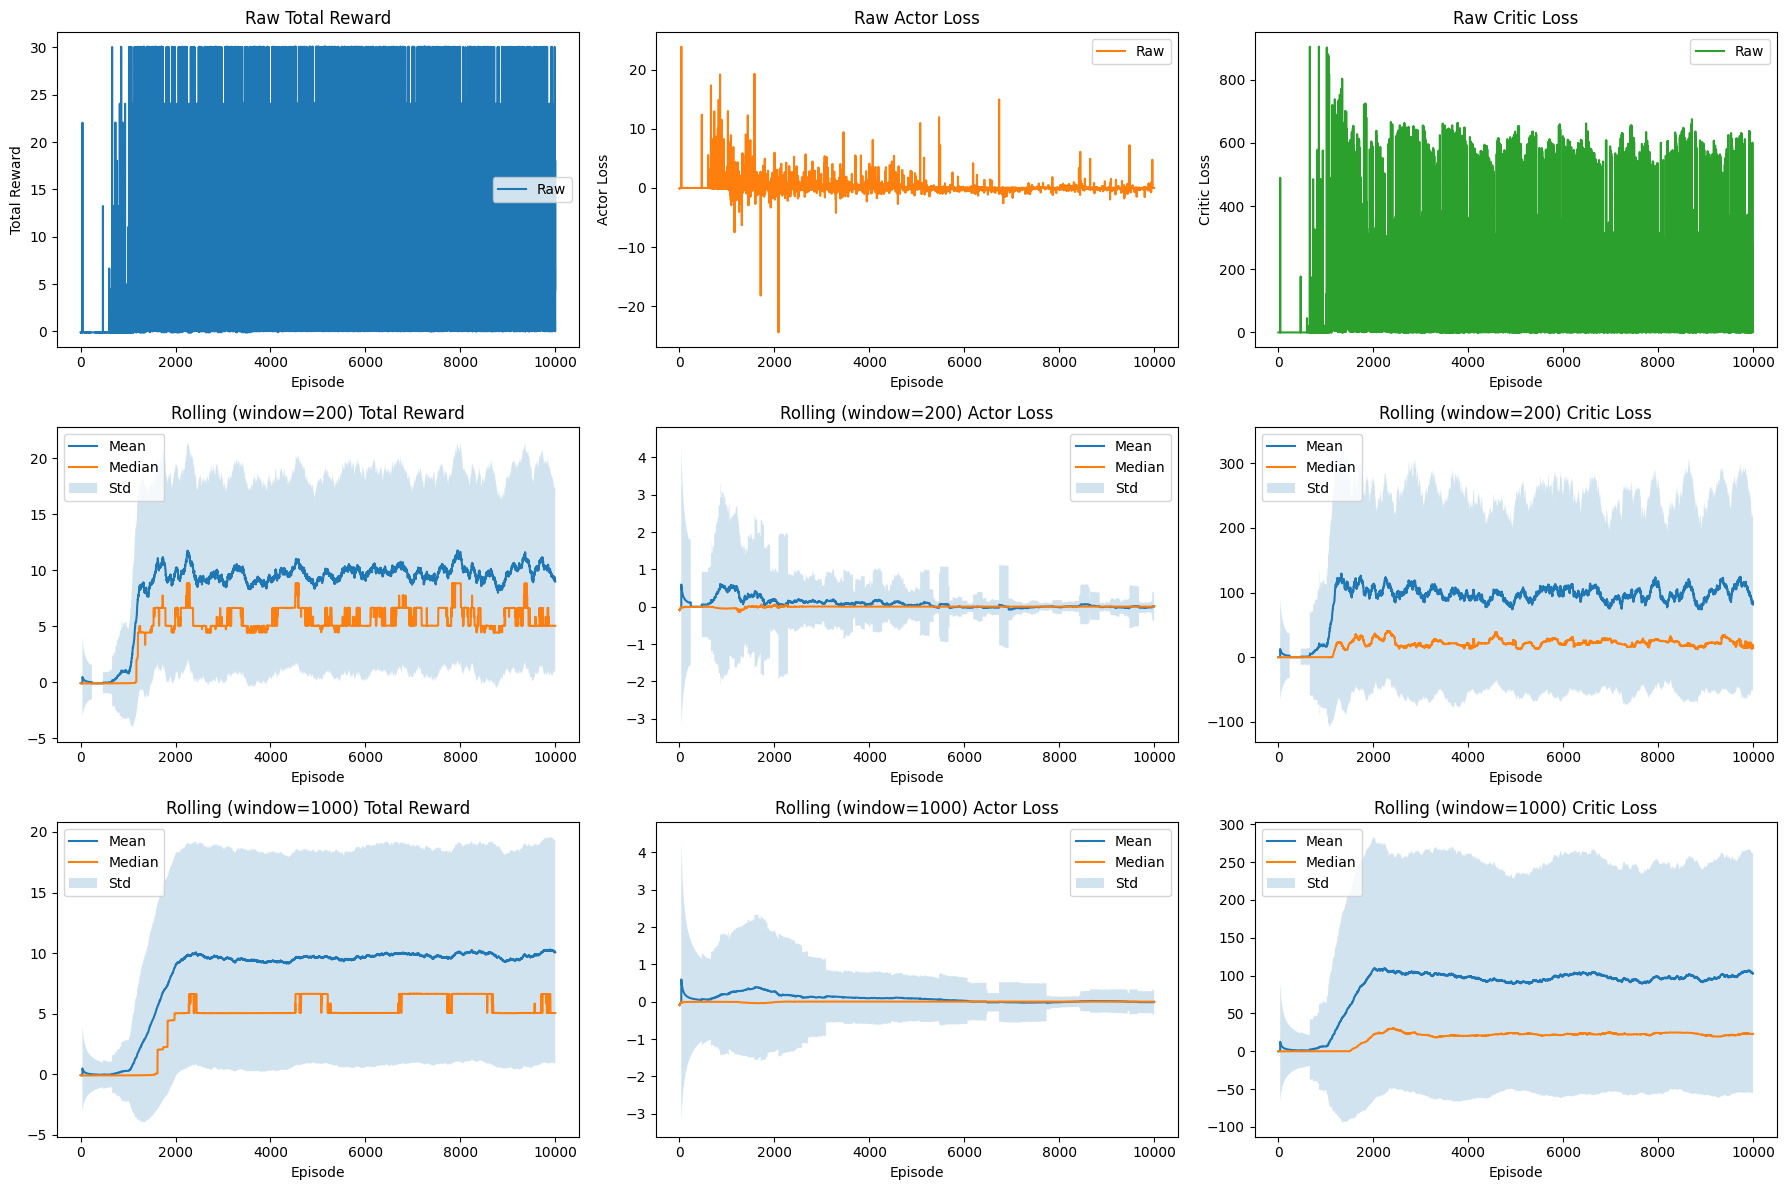

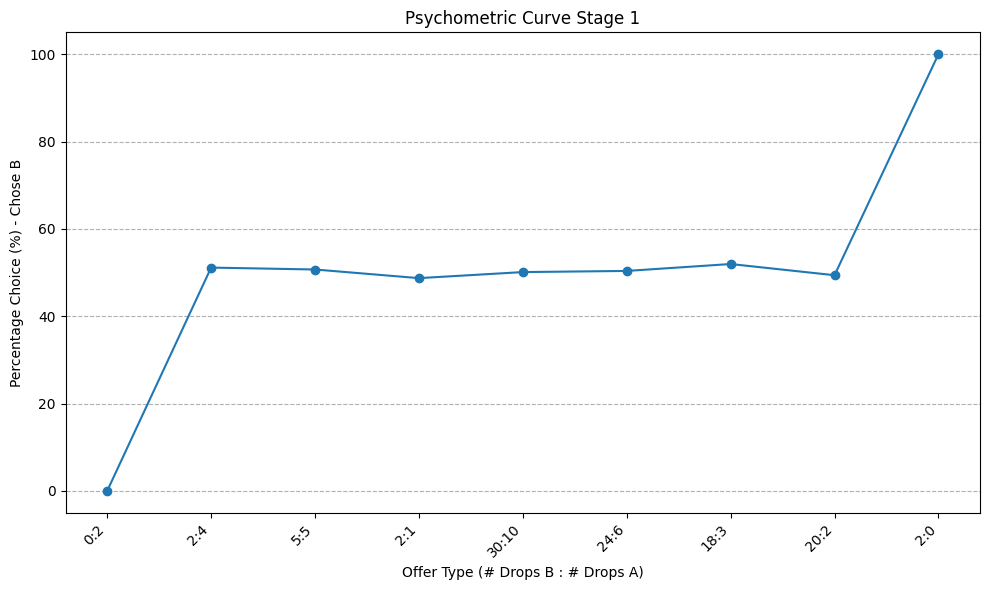

Closing the environment...
Environment closed.


: 

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, \
    actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Save checkpoint ---
    this_stage = 1
    this_ckpt_dir = 'checkpoints/rnn_nohold_3_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "rnn_nohold_3_max_stage_1.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Training Metrics & Psychometric Curve ---
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )
    plot_psychometric_curve(
        measurements_juices,
        title="Psychometric Curve Stage 1"
    )

    # --- Close Environment ---
    print("Closing the environment...")
    env.close()
    print("Environment closed.")

if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.002
  critic_lr: 0.002
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...


2025-05-20 09:39:54.351372: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 1...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_3_max_1/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 2.24	State [ 0.         -1.          0.03333334  0.06666667]	Actor Loss: -0.0989	Critic Loss: 12.7058
Episode 200	Total Reward: 0.02	State [0.         1.         0.         0.06666667]	Actor Loss: 0.0029	Critic Loss: 34.1593
Episode 300	Total Reward: 5.04	State [0.         1.         0.16666667 0.16666667]	Actor Loss: 0.0002	Critic Loss: 0.3833
Episode 400	Total Reward: 8.84	State [ 0.         -1.          0.13333334  0.06666667]	Actor Loss: 0.0031	Critic Loss: 18.0812
Episode 500	Total Reward: 11.05	State [ 0.         -1.          0.16666667  0.16666667]	Actor Loss: 0.0029	Critic Loss: 26.473

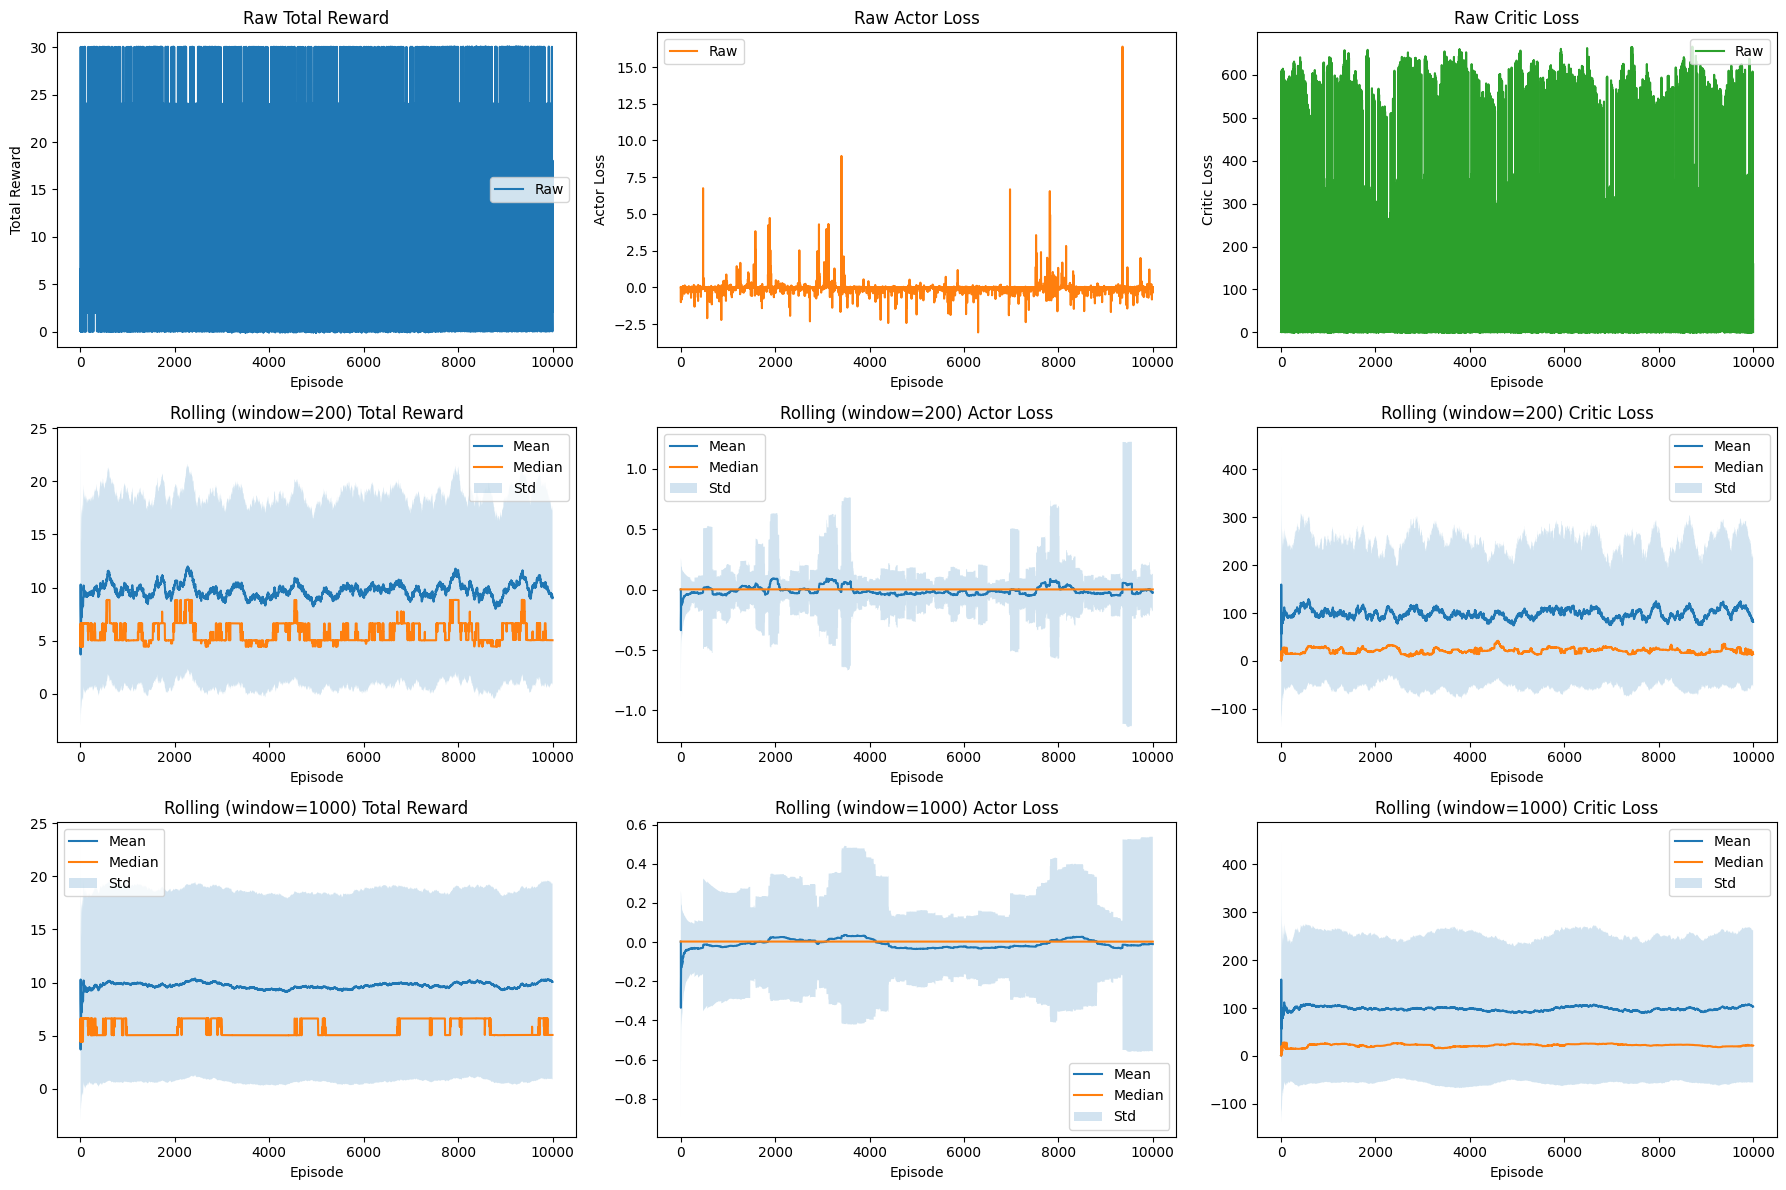

Plotting psychometric curve...


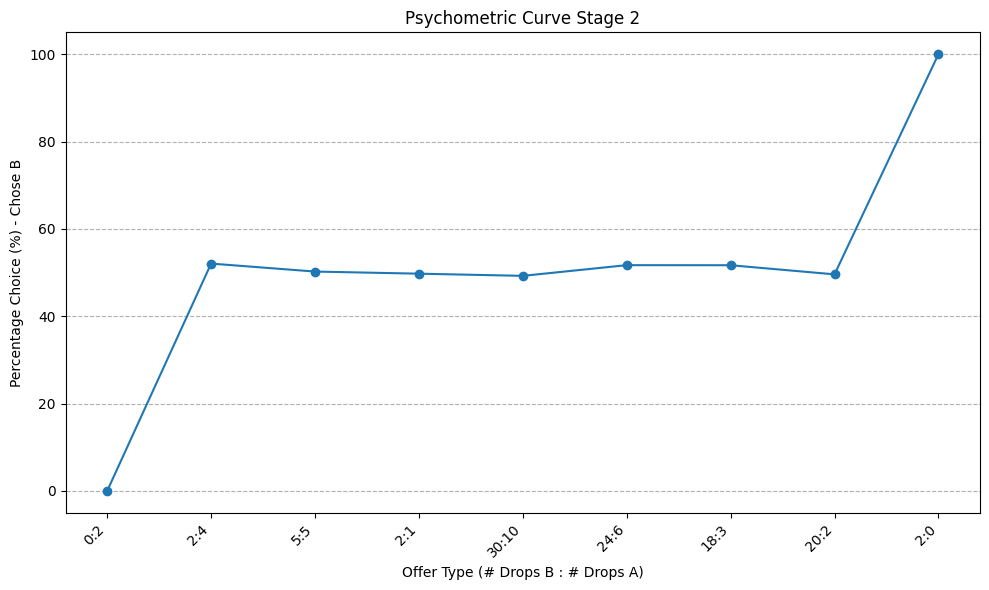

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 2e-3,
        "critic_lr": 2e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/rnn_nohold_3_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 2 finished.")

    # --- Save checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/rnn_nohold_3_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "rnn_nohold_3_max_stage_2.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 2")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 2e-3,
        "critic_lr": 2e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/rnn_nohold_3_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 3 finished.")

    # --- Save checkpoint ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/rnn_nohold_3_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "rnn_nohold_3_max_stage_3.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 2")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.01
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.002
  critic_lr: 0.002
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 2...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_3_max_2/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 2.27	State [ 0.         -1.          0.05989901  0.        ]	Actor Loss: -0.0001	Critic Loss: 8.5932
Episode 200	Total Reward: 5.04	State [0.         1.         0.16417862 0.15116103]	Actor Loss: -0.0713	Critic Loss: 0.1517
Episode 300	Total Reward: 0.05	State [ 0.         -1.          0.02561686  0.03689786]	Actor Loss: 0.0023	Critic Loss: 29.5696
Episode 400	Total Reward: 2.03	State [0.         1.         0.08360182 0.05614477]	Actor Loss: -0.0183	Critic Loss: 9.9087
Episode 500	Total Reward: 0.03	State [0.         1.         0.08049726 0.063541  ]	Actor Loss: -0.0217	Critic Loss: 23.5561
Episode 600	Total Reward: 6.66	State [ 0.         -1.          0.20085534  0.6137488 ]	Actor Loss: 0.0070	Critic Loss: 2.7942
Episode 700	Total Reward: 11.06	State [ 0.         -1.          0.04863514  0.06869785]

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 2e-3,
        "critic_lr": 2e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/rnn_nohold_2_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 3 finished.")

    # --- Save checkpoint ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/rnn_nohold_2_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "rnn_nohold_2_max_stage_4.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 2")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 1e-3,
        "critic_lr": 1e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/rnn_nohold_2_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 3 finished.")

    # --- Save checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/rnn_nohold_2_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "rnn_nohold_2_max_stage_5.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 2")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 1e-3,
        "critic_lr": 1e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 6
    this_ckpt_dir = 'checkpoints/rnn_nohold_2_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 6 finished.")

    # --- Save checkpoint ---
    this_stage = 6
    this_ckpt_dir = 'checkpoints/rnn_nohold_2_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "rnn_nohold_2_max_stage_6.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 2")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()